In [1]:
import rasterio
from matplotlib import pyplot as plt
from rasterio.plot import show
import geopandas as gpd

import sys
sys.path.insert(0, "..")

from eis_toolkit.prediction.wofe_new import weights_of_evidence

In [2]:
# with rasterio.open("../tests/data/remote/wofe/wofe_ev_nan.tif") as test_ev:
#     with rasterio.open("../tests/data/remote/wofe/wofe_dep_nan_.tif") as test_dep:
with rasterio.open("../tests/data/local/Int_wofe_ev_nan.tif") as test_ev:
    # with rasterio.open("../tests/data/local/wofe_dep_new.tif") as test_dep:
    gdf = gpd.read_file("../tests/data/local/Dep1s.shp")
    test_wgt_un_, test_gen_un_, test_rst_meta = weights_of_evidence(test_ev, gdf, weights_type='unique')
    test_wgt_asc_, test_gen_asc_, test_rst_meta = weights_of_evidence(test_ev, gdf, weights_type='ascending', studentized_contrast_threshold=1)
    test_wgt_dsc_, test_gen_dsc_, test_rst_meta = weights_of_evidence(test_ev, gdf, weights_type='descending', studentized_contrast_threshold=1)

In [3]:
# UNIQUE
test_wgt_un_

,Class,Count,Point Count,WPlus,S_WPlus,WMinus,S_WMinus,Contrast,S_Contrast,Studentized contrast
0,1.0,275,9,0.481,0.339,-0.399,0.381,0.880,0.510,1.728
1,2.0,11,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,3.0,396,5,-0.492,0.450,0.341,0.306,-0.833,0.544,-1.531
3,5.0,43,1,0.130,1.012,-0.008,0.261,0.138,1.045,0.132
4,6.0,1,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,8.0,43,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,10.0,2,1,3.867,1.414,-0.063,0.261,3.931,1.438,2.733
7,13.0,10,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [4]:
# ASCENDING
test_wgt_asc_

,Class,Count,Point Count,WPlus,S_WPlus,WMinus,S_WMinus,Contrast,S_Contrast,Studentized contrast,Generalized class,Generalized WPlus,Generalized S_WPlus
0,1.0,275,9,0.481,0.339,-0.399,0.381,0.880,0.510,1.728,2,0.481,0.3389
1,2.0,286,9,0.440,0.339,-0.377,0.381,0.818,0.510,1.605,1,0.030,0.1011
2,3.0,682,14,0.002,0.270,-0.014,0.714,0.016,0.764,0.021,1,0.030,0.1011
3,5.0,725,15,0.010,0.261,-0.140,1.009,0.150,1.042,0.144,1,0.030,0.1011
4,6.0,726,15,0.009,0.261,-0.122,1.009,0.130,1.042,0.125,1,0.030,0.1011
5,8.0,769,15,-0.050,0.261,1.469,1.044,-1.519,1.077,-1.411,1,0.030,0.1011
6,10.0,771,16,0.013,0.253,0.000,0.316,0.013,0.405,0.033,1,0.030,0.1011
7,13.0,781,16,0.000,0.253,0.000,0.000,0.000,0.253,0.000,1,0.030,0.1011


In [5]:
# DESCENDING
test_wgt_dsc_

,Class,Count,Point Count,WPlus,S_WPlus,WMinus,S_WMinus,Contrast,S_Contrast,Studentized contrast,Generalized class,Generalized WPlus,Generalized S_WPlus
0,13.0,10,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2,0.8228,1.0235
1,10.0,12,1,1.469,1.044,-0.050,0.261,1.519,1.077,1.411,2,0.8228,1.0235
2,8.0,55,1,-0.122,1.009,0.009,0.261,-0.130,1.042,-0.125,1,-0.1860,0.1730
3,6.0,56,1,-0.140,1.009,0.010,0.261,-0.150,1.042,-0.144,1,-0.1860,0.1730
4,5.0,99,2,-0.014,0.714,0.002,0.270,-0.016,0.764,-0.021,1,-0.1860,0.1730
5,3.0,495,7,-0.377,0.381,0.440,0.339,-0.818,0.510,-1.605,1,-0.1860,0.1730
6,2.0,506,7,-0.399,0.381,0.481,0.339,-0.880,0.510,-1.728,1,-0.1860,0.1730
7,1.0,781,16,0.000,0.253,0.000,0.000,0.000,0.253,0.000,1,-0.1860,0.1730


<Axes: title={'center': 'Generalized weights'}>

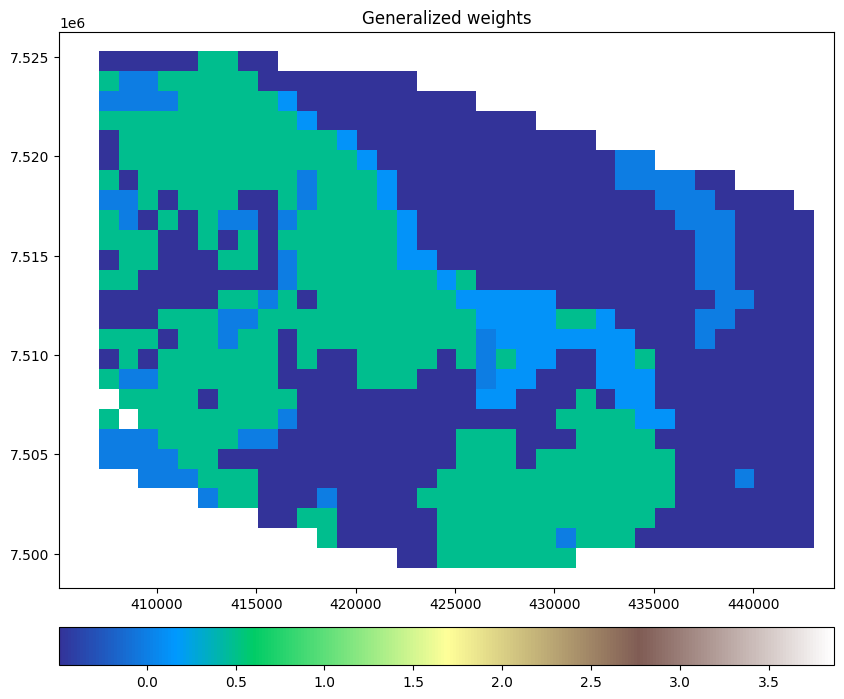

In [6]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Generalized weights")
clrbar = ax.imshow(test_gen_un_["WPlus"], cmap='terrain')
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(test_gen_un_["WPlus"], ax = ax, transform = test_ev.transform, cmap='terrain')

<Axes: title={'center': 'Generalized weights'}>

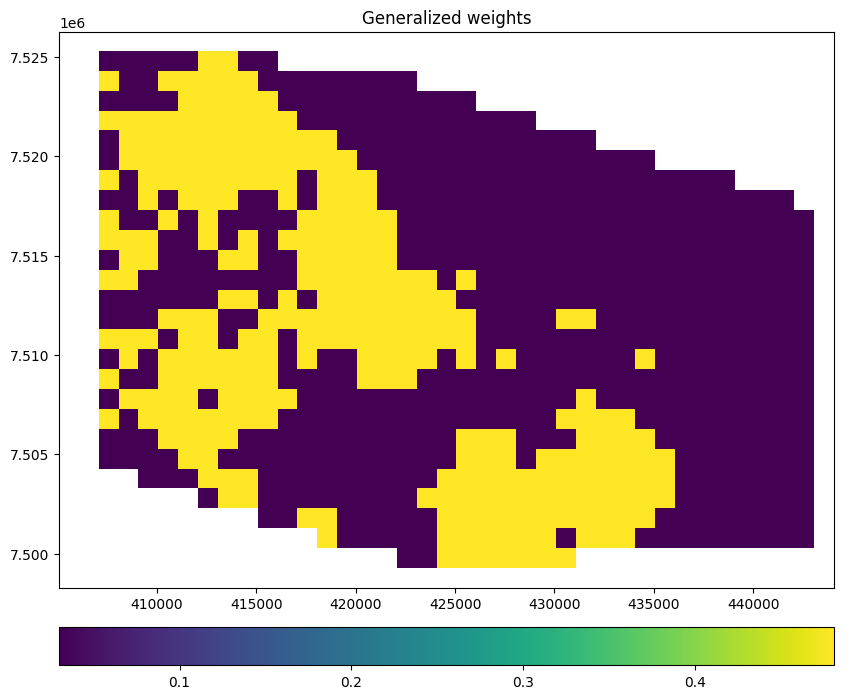

In [7]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Generalized weights")
clrbar = ax.imshow(test_gen_asc_["Generalized WPlus"], cmap='viridis')
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(test_gen_asc_["Generalized WPlus"], ax = ax, transform = test_ev.transform, cmap='viridis')

<Axes: title={'center': 'Generalized weights'}>

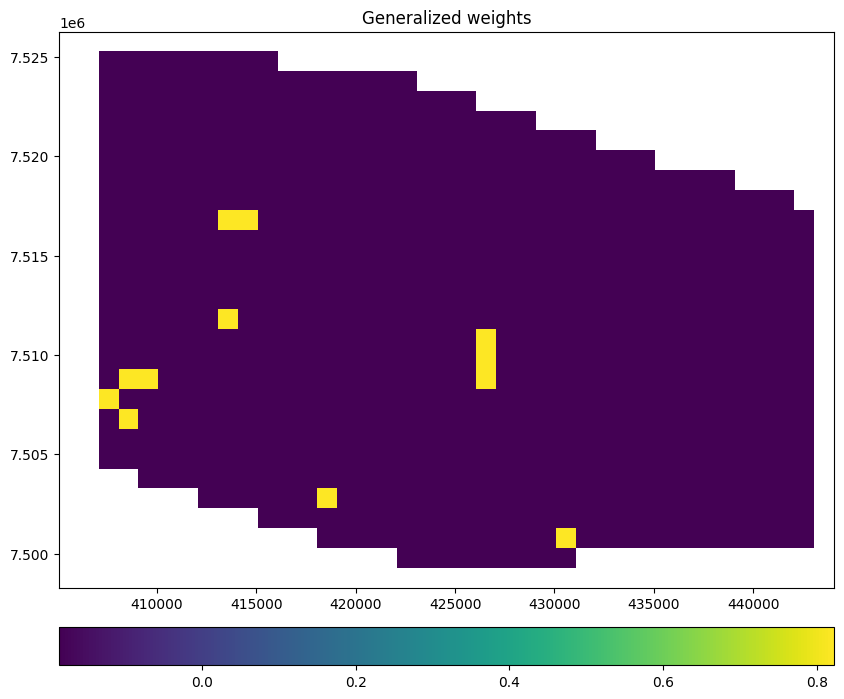

In [8]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Generalized weights")
clrbar = ax.imshow(test_gen_dsc_["Generalized WPlus"], cmap='viridis')
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(test_gen_dsc_["Generalized WPlus"], ax = ax, transform = test_ev.transform, cmap='viridis')